# Resultados

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import clf_vAngra_lib as vCLF

from astropy.stats import mad_std
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

%matplotlib inline
#plt.style.use('seaborn-white')
plt.rcParams['xtick.labelsize']  = 18
plt.rcParams['ytick.labelsize']  = 18
plt.rcParams['axes.labelsize']   = 18
plt.rcParams['axes.titlesize']   = 18
plt.rcParams['legend.fontsize']  = 18

## Load dos Dados

In [2]:
df = pd.read_csv('../data/DataFrame_Aqst.csv',index_col=0)
df.head()

,Amp,Area,Pos_Amp,FWHM,Label
0,6.023878,56.830998,14.0,8.0,1.0
1,5.075051,-37.835989,13.0,6.0,1.0
2,5.075051,-37.945485,13.0,6.0,1.0
3,5.573990,29.943948,14.0,7.0,1.0
4,5.061862,-21.486767,14.0,8.0,1.0


In [3]:
Y = np.array(df['Label'])  
X = np.array(df.drop(['Label'], axis=1))
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

## Classificadores

In [4]:
# Neutrinos Algorithm
results_NCLF = ([])
f1_cm_NCLF = ([])
fa_NCLF = ([])
for train_index, test_index in kfold.split(X):
    xTrain, xTest = X[train_index], X[test_index]
    yTrain, yTest = Y[train_index], Y[test_index]
    dfTrain = pd.DataFrame(np.concatenate((xTrain, yTrain.reshape(-1,1)), axis=1), 
                columns=['Amp', 'Area', 'Pos_Amp', 'FWHM', 'Label'])
    dfTest = pd.DataFrame(np.concatenate((xTest, yTest.reshape(-1,1)), axis=1), 
                columns=['Amp', 'Area', 'Pos_Amp', 'FWHM', 'Label'])
    f1_NC_train, angle, dfNew = vCLF.NeutrinosClassifier(dfTrain, 'None', 2.55, test=True)
    f1_NC_test, angle, dfNew  = vCLF.NeutrinosClassifier(dfTest, angle, 2.55, test=True)
    cm_NCLF = confusion_matrix(dfNew.Label, dfNew.Tag,normalize='true')
    f1_cm_NCLF = np.append(f1_cm_NCLF, cm_NCLF.diagonal(), axis=0)
    fa_NCLF = np.append(fa_NCLF, np.sum(cm_NCLF,axis=0)-cm_NCLF.diagonal())
    results_NCLF = np.append(results_NCLF, f1_NC_test)

f1_cm_NCLF = f1_cm_NCLF.reshape(10,4)
fa_NCLF = fa_NCLF.reshape(10,4)

/home/marimigliorini/classification_neutrinos/clf_vAngra_lib.py:65: RankWarning: Polyfit may be poorly conditioned
  angle = getAngle(df.Area[df.Label==1],df.Amp[df.Label==1])
/home/marimigliorini/classification_neutrinos/clf_vAngra_lib.py:65: RankWarning: Polyfit may be poorly conditioned
  angle = getAngle(df.Area[df.Label==1],df.Amp[df.Label==1])
/home/marimigliorini/classification_neutrinos/clf_vAngra_lib.py:65: RankWarning: Polyfit may be poorly conditioned
  angle = getAngle(df.Area[df.Label==1],df.Amp[df.Label==1])
/home/marimigliorini/classification_neutrinos/clf_vAngra_lib.py:65: RankWarning: Polyfit may be poorly conditioned
  angle = getAngle(df.Area[df.Label==1],df.Amp[df.Label==1])
/home/marimigliorini/classification_neutrinos/clf_vAngra_lib.py:65: RankWarning: Polyfit may be poorly conditioned
  angle = getAngle(df.Area[df.Label==1],df.Amp[df.Label==1])
/home/marimigliorini/classification_neutrinos/clf_vAngra_lib.py:65: RankWarning: Polyfit may be poorly conditioned
  ang

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# MLP
results_MLP = np.array([])
f1_cm_MLP = ([])
fa_MLP = ([])
for train_index, test_index in kfold.split(X):
    xTrain, xTest = X[train_index], X[test_index]
    yTrain, yTest = Y[train_index], Y[test_index]
    clf_MLP = MLPClassifier(hidden_layer_sizes=(8,8), solver='sgd', max_iter=2000, random_state=1, activation='relu')
    clf_MLP.fit(xTrain, yTrain)
    pred_MLP = clf_MLP.predict(xTest)
    f1 = f1_score(yTest, pred_MLP,average='micro')
    cm_MLP = confusion_matrix(yTest, pred_MLP,normalize='true')
    f1_cm_MLP = np.append(f1_cm_MLP, cm_MLP.diagonal(), axis=0)
    fa_MLP = np.append(fa_MLP, np.sum(cm_MLP,axis=0)-cm_MLP.diagonal())
    results_MLP = np.append(results_MLP, f1)

f1_cm_MLP = f1_cm_MLP.reshape(10,4)

In [7]:
# Logistic Regression
results_LR = np.array([])
f1_cm_LR = np.array([])
fa_LR = ([])
for train_index, test_index in kfold.split(X):
    xTrain, xTest = X[train_index], X[test_index]
    yTrain, yTest = Y[train_index], Y[test_index]
    clf_LR = LogisticRegression(random_state=1, max_iter=2000, solver='sag')
    clf_LR.fit(xTrain, yTrain)
    pred_LR = clf_LR.predict(xTest)
    f1 = f1_score(yTest, pred_LR,average='micro')
    cm_LR = confusion_matrix(yTest, pred_LR,normalize='true')
    f1_cm_LR = np.append(f1_cm_LR, cm_LR.diagonal(), axis=0)
    fa_LR = np.append(fa_LR, np.sum(cm_LR,axis=0)-cm_LR.diagonal())
    results_LR = np.append(results_LR, f1)

f1_cm_LR = f1_cm_LR.reshape(10,4)

In [8]:
# Random Forest
results_RF = np.array([])
f1_cm_RF = np.array([])
fa_RF = ([])
for train_index, test_index in kfold.split(X):
    xTrain, xTest = X[train_index], X[test_index]
    yTrain, yTest = Y[train_index], Y[test_index]
    clf_RF = RandomForestClassifier(n_estimators=75, bootstrap=True, random_state=1)
    clf_RF.fit(xTrain, yTrain)
    pred_RF = clf_RF.predict(xTest)
    f1 = f1_score(yTest, pred_RF,average='micro')
    cm_RF = confusion_matrix(yTest, pred_RF,normalize='true')
    f1_cm_RF = np.append(f1_cm_RF, cm_RF.diagonal(), axis=0)
    fa_RF = np.append(fa_RF, np.sum(cm_RF,axis=0)-cm_RF.diagonal())
    results_RF = np.append(results_RF, f1)

f1_cm_RF = f1_cm_RF.reshape(10,4)
fa_RF = fa_RF.reshape(10,4)

In [9]:
clf_lb = ['Neutrinos','Logistic Regression', 'MLP', 'Random Forest']

## Verdadeiros Positivos

In [10]:
f1_cm_NCLF = np.load('../data/f1_cm_NCLF.npy')
f1_cm_LR   = np.load('../data/f1_cm_LR.npy')
f1_cm_MLP  = np.load('../data/f1_cm_MLP.npy')
f1_cm_RF   = np.load('../data/f1_cm_RF.npy')

In [11]:
# Mean
tp_sig_mean = [np.mean(f1_cm_NCLF,axis=0)[0], np.mean(f1_cm_LR,axis=0)[0],
               np.mean(f1_cm_MLP,axis=0)[0], np.mean(f1_cm_RF,axis=0)[0]]

tp_sat_mean = [np.mean(f1_cm_NCLF,axis=0)[1], np.mean(f1_cm_LR,axis=0)[1],
               np.mean(f1_cm_MLP,axis=0)[1], np.mean(f1_cm_RF,axis=0)[1]]

tp_cut_mean = [np.mean(f1_cm_NCLF,axis=0)[2], np.mean(f1_cm_LR,axis=0)[2],
               np.mean(f1_cm_MLP,axis=0)[2], np.mean(f1_cm_RF,axis=0)[2]]

tp_dpc_mean = [np.mean(f1_cm_NCLF,axis=0)[3], np.mean(f1_cm_LR,axis=0)[3],
               np.mean(f1_cm_MLP,axis=0)[3], np.mean(f1_cm_RF,axis=0)[3]]

In [12]:
# Error
tp_sig_erro = [mad_std(f1_cm_NCLF,axis=0)[0]/np.sqrt(10), mad_std(f1_cm_LR,axis=0)[0]/np.sqrt(10),
               mad_std(f1_cm_MLP,axis=0)[0]/np.sqrt(10),mad_std(f1_cm_RF,axis=0)[0]/np.sqrt(10)]

tp_sat_erro = [mad_std(f1_cm_NCLF,axis=0)[1]/np.sqrt(10), mad_std(f1_cm_LR,axis=0)[1]/np.sqrt(10),
               mad_std(f1_cm_MLP,axis=0)[1]/np.sqrt(10), mad_std(f1_cm_RF,axis=0)[1]/np.sqrt(10)]

tp_cut_erro = [mad_std(f1_cm_NCLF,axis=0)[2]/np.sqrt(10), mad_std(f1_cm_LR,axis=0)[2]/np.sqrt(10),
               mad_std(f1_cm_MLP,axis=0)[2]/np.sqrt(10), mad_std(f1_cm_RF,axis=0)[2]/np.sqrt(10)]

tp_dpc_erro = [mad_std(f1_cm_NCLF,axis=0)[3]/np.sqrt(10), mad_std(f1_cm_LR,axis=0)[3]/np.sqrt(10),
               mad_std(f1_cm_MLP,axis=0)[3]/np.sqrt(10), mad_std(f1_cm_RF,axis=0)[3]/np.sqrt(10)]

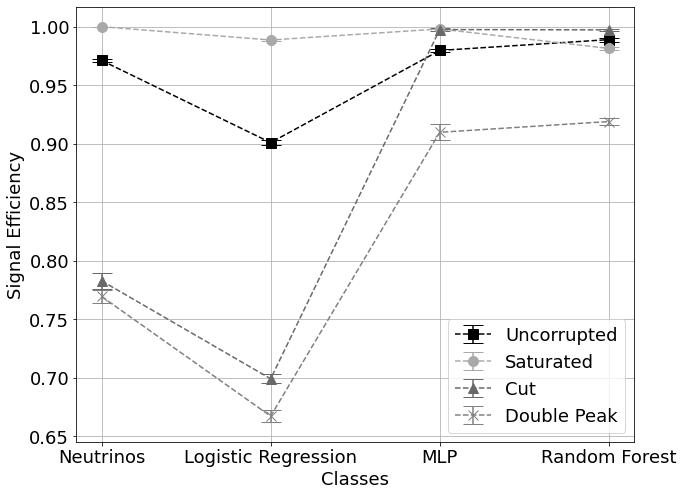

In [13]:
plt.figure(figsize=(10,8))
plt.errorbar(clf_lb, tp_sig_mean, yerr=tp_sig_erro,capsize=10,fmt='--s',label='Uncorrupted',markersize=10,color='black')
plt.errorbar(clf_lb, tp_sat_mean, yerr=tp_sat_erro,capsize=10,fmt='--o',label='Saturated',markersize=10,color='darkgrey')
plt.errorbar(clf_lb, tp_cut_mean, yerr=tp_cut_erro,capsize=10,fmt='--^',label='Cut',markersize=10,color='dimgray')
plt.errorbar(clf_lb, tp_dpc_mean, yerr=tp_dpc_erro,capsize=10,fmt='--x',label='Double Peak',markersize=10,color='gray')


plt.grid()
plt.legend()
plt.xlabel('Classes')
plt.ylabel('Signal Efficiency')

#plt.savefig('efficiency.pdf', format='pdf',dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Falsos negativos

In [14]:
fa_NCLF = np.load('../data/fa_NCLF.npy')
fa_LR   = np.load('../data/fa_LR.npy')
fa_MLP  = np.load('../data/fa_MLP.npy')
fa_RF   = np.load('../data/fa_RF.npy')

In [15]:
# Mean
fa_sig_mean = [np.mean(fa_NCLF,axis=0)[0], np.mean(fa_LR,axis=0)[0], 
               np.mean(fa_MLP,axis=0)[0], np.mean(fa_RF,axis=0)[0]]

fa_sat_mean = [np.mean(fa_NCLF,axis=0)[1], np.mean(fa_LR,axis=0)[1],
               np.mean(fa_MLP,axis=0)[1], np.mean(fa_RF,axis=0)[1]]

fa_cut_mean = [np.mean(fa_NCLF,axis=0)[2], np.mean(fa_LR,axis=0)[2],
               np.mean(fa_MLP,axis=0)[2], np.mean(fa_RF,axis=0)[2]]

fa_dpc_mean = [np.mean(fa_NCLF,axis=0)[3], np.mean(fa_LR,axis=0)[3],
               np.mean(fa_MLP,axis=0)[3], np.mean(fa_RF,axis=0)[3]]

In [16]:
# Error
fa_sig_erro = [mad_std(fa_NCLF,axis=0)[0]/np.sqrt(10), mad_std(fa_LR,axis=0)[0]/np.sqrt(10),
               mad_std(fa_MLP,axis=0)[0]/np.sqrt(10), mad_std(fa_RF,axis=0)[0]/np.sqrt(10)]

fa_sat_erro = [mad_std(fa_NCLF,axis=0)[1]/np.sqrt(10), mad_std(fa_LR,axis=0)[1]/np.sqrt(10),
               mad_std(fa_MLP,axis=0)[1]/np.sqrt(10), mad_std(fa_RF,axis=0)[1]/np.sqrt(10)]

fa_cut_erro = [mad_std(fa_NCLF,axis=0)[2]/np.sqrt(10), mad_std(fa_LR,axis=0)[2]/np.sqrt(10),
               mad_std(fa_MLP,axis=0)[2]/np.sqrt(10), mad_std(fa_RF,axis=0)[2]/np.sqrt(10)]

fa_dpc_erro = [mad_std(fa_NCLF,axis=0)[3]/np.sqrt(10), mad_std(fa_LR,axis=0)[3]/np.sqrt(10),
               mad_std(fa_MLP,axis=0)[3]/np.sqrt(10), mad_std(fa_RF,axis=0)[3]/np.sqrt(10)]

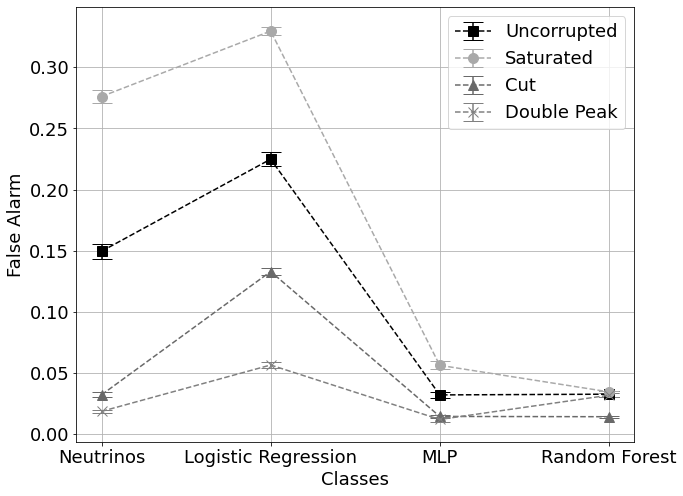

In [17]:
plt.figure(figsize=(10,8))
plt.errorbar(clf_lb, fa_sig_mean, yerr=fa_sig_erro,capsize=10,fmt='--s',label='Uncorrupted',markersize=10,color='black')
plt.errorbar(clf_lb, fa_sat_mean, yerr=fa_sat_erro,capsize=10,fmt='--o',label='Saturated',markersize=10,color='darkgrey')
plt.errorbar(clf_lb, fa_cut_mean, yerr=fa_cut_erro,capsize=10,fmt='--^',label='Cut',markersize=10,color='dimgray')
plt.errorbar(clf_lb, fa_dpc_mean, yerr=fa_dpc_erro,capsize=10,fmt='--x',label='Double Peak',markersize=10,color='gray')


plt.grid()
plt.legend()
plt.xlabel('Classes')
plt.ylabel('False Alarm')

#plt.savefig('falseAlarm.pdf', format='pdf',dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()